In [1]:
# arrays
import numpy as np

# fits
from astropy.io import fits
from astropy.utils.data import download_file
from astropy.visualization import simple_norm

# plotting
%matplotlib inline
from matplotlib import pyplot as plt
import random

# keras
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Input, Flatten, Dense, Activation, Dropout, BatchNormalization
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

# sklearn (for machine learning)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#from astropy.visualization import make_lupton_rgb

In [2]:
config1 = np.load('D:/SL CNN/CONFIGURATION_1_images1.npy')
config2 = np.load('D:/SL CNN/CONFIGURATION_2_images1.npy')

In [3]:
print(np.shape(config1))
print(np.shape(config2))

(1249, 3, 100, 100)
(1249, 3, 100, 100)


In [4]:
data = np.concatenate((config1, config2), axis=0)
print(np.shape(data))

(2498, 3, 100, 100)


In [5]:
label1 = np.ones(len(config1[0:]))
label2 = np.zeros(len(config2[0:]))
label = np.concatenate((label1, label2))
print(np.shape(label))

(2498,)


In [6]:
#get random indices
x = np.empty(1)
i = 1

while i < 16:
    example_num = int(random.randrange(0, len(data[0:])))
    if example_num != x[i-1]:
        x = np.append(x, [example_num])
        i += 1

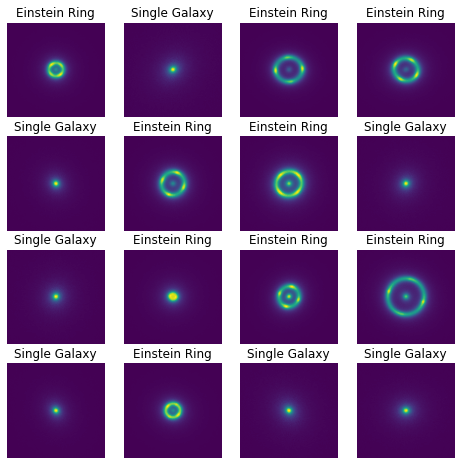

In [7]:
#plot the examples
fig1=plt.figure(figsize=(8,8))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.axis("off")
    
    example_indices = int(x[i])
    
    example_image = np.squeeze(data[example_indices:(example_indices + 1), 0:1]) #change band by switching 0:1 to 1:2 or 2:3
    
    plt.imshow(example_image, aspect='auto', cmap='viridis')
    if label[example_indices] == 1:
        plt.title('Einstein Ring')
    else:
        plt.title('Single Galaxy')

In [8]:
y = label.astype('float32')
X = data.astype('float32')

In [9]:
X_train, X_split, y_train, y_split = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

X_valid, X_test, y_valid, y_test = train_test_split(X_split, y_split, test_size=0.666, random_state=42, shuffle=True)

In [10]:
imsize = np.shape(X_train)[2]

X_train = X_train.reshape(-1, imsize, imsize, 3)
X_valid = X_valid.reshape(-1, imsize, imsize, 3)
X_test = X_test.reshape(-1, imsize, imsize, 3)

print(np.shape(X_train))

(1748, 100, 100, 3)


In [11]:
imsize = np.shape(X_train)[2]

data_shape = np.shape(X)
input_shape = (imsize, imsize, 3)

x_in = Input(shape=input_shape)
a0 = Convolution2D(32, (3, 3), activation='relu')(x_in)
b0 = MaxPooling2D()(a0)

a1 = Convolution2D(32, (3, 3), activation='relu')(b0)
b1 = MaxPooling2D()(a1)

a2 = Convolution2D(32, (3, 3), activation='relu')(b1)
b2 = MaxPooling2D()(a2)

a3 = Flatten()(b2)

a4 = Dense(64, activation='relu')(a3)
b4 = Dense(128, activation='relu')(a4)

y_out = Dense(1, activation='sigmoid')(b4)

model = Model(inputs=x_in, outputs=y_out)

In [12]:
#from keras.optimizers import SGD
opt = 'adam'
metrics = ['accuracy']
loss = 'binary_crossentropy'
model.compile(loss=loss, optimizer=opt, metrics=metrics)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 32)        9248  

In [13]:
nb_epoch = 20
batch_size = 128
shuffle = True

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    validation_data=(X_valid, y_valid),                
                    shuffle=shuffle,
                    verbose=True)

Epoch 1/20
14/14 [==============================] - 6s 260ms/step - loss: 0.7116 - accuracy: 0.8112 - val_loss: 0.1345 - val_accuracy: 0.9960
Epoch 2/20
14/14 [==============================] - 4s 251ms/step - loss: 0.1184 - accuracy: 0.9880 - val_loss: 0.0338 - val_accuracy: 0.9960
Epoch 3/20
14/14 [==============================] - 3s 246ms/step - loss: 0.0356 - accuracy: 0.9949 - val_loss: 0.0127 - val_accuracy: 1.0000
Epoch 4/20
14/14 [==============================] - 4s 255ms/step - loss: 0.0157 - accuracy: 0.9977 - val_loss: 0.0086 - val_accuracy: 1.0000
Epoch 5/20
14/14 [==============================] - 4s 260ms/step - loss: 0.0143 - accuracy: 0.9977 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 6/20
14/14 [==============================] - 4s 275ms/step - loss: 0.0059 - accuracy: 0.9989 - val_loss: 9.6932e-04 - val_accuracy: 1.0000
Epoch 7/20
14/14 [==============================] - 4s 276ms/step - loss: 0.0102 - accuracy: 0.9977 - val_loss: 0.0074 - val_accuracy: 1.0000
Ep

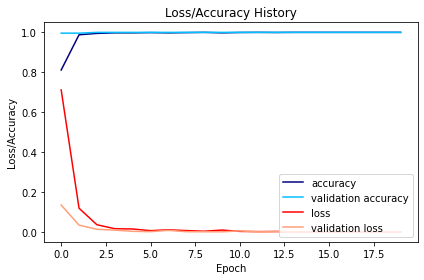

In [14]:
# plot

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = list(range(len(loss)))
figsize=(6,4)
fig, axis1 = plt.subplots(figsize=figsize)
plot1_lacc = axis1.plot(epochs, acc, 'navy', label='accuracy')
plot1_val_lacc = axis1.plot(epochs, val_acc, 'deepskyblue', label="validation accuracy")

plot1_loss = axis1.plot(epochs, loss, 'red', label='loss')
plot1_val_loss = axis1.plot(epochs, val_loss, 'lightsalmon', label="validation loss")


plots = plot1_loss + plot1_val_loss
labs = [l.get_label() for l in plots]
axis1.set_xlabel('Epoch')
axis1.set_ylabel('Loss/Accuracy')
plt.title("Loss/Accuracy History")
plt.tight_layout()
axis1.legend(loc='lower right')

In [15]:
score = model.evaluate(X_test, y_test, verbose=True)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

16/16 [==============================] - 0s 14ms/step - loss: 1.9530e-04 - accuracy: 1.0000
accuracy: 100.00%


16/16 [==============================] - 0s 14ms/step


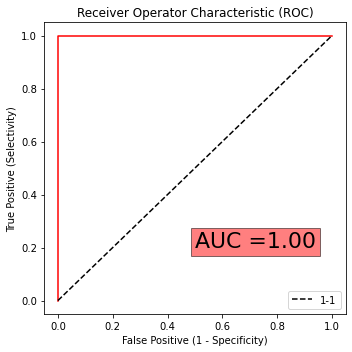

In [16]:
# predict
prob = model.predict(X_test)
pred =  (prob > 0.5).astype('int32') 

fpr, tpr, thresholds = roc_curve(y_test, prob, pos_label=1)
auc = roc_auc_score(y_test, prob)


figsize=(5,5)
fig, axis1 = plt.subplots(figsize=figsize)
x_onetoone = y_onetoone = [0, 1]
plt.plot(fpr, tpr, 'r-')
plt.plot(x_onetoone, y_onetoone, 'k--',  label="1-1")
plt.legend(loc=0)
plt.title("Receiver Operator Characteristic (ROC)")
plt.xlabel("False Positive (1 - Specificity)")
plt.ylabel("True Positive (Selectivity)")
plt.text(0.5, 0.2, "AUC ="+"{0:.2f}".format(auc), fontsize = 22, 
         bbox = dict(facecolor = 'red', alpha = 0.5))
plt.tight_layout()

In [17]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, pred)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test, pred)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, pred)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, pred)
print('F1 score: %f' % f1)

Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
F1 score: 1.000000
